In [1]:
from manage_data import get_datasets, evaluate_model, plot_confusion_matrix
# from manage_data import plot_coefficients_linSVC
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
def plot_coefficients_linSVC(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(60, 20))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

In [3]:
df = get_datasets(std_size=True)
y = df['BRCA'].values
X = df.drop('BRCA', axis=1)
def reset_data():
    df = get_datasets(std_size=True)
    y = df['BRCA'].values
    X = df.drop('BRCA', axis=1)

size brca, ovca 1080 579
sampled size 1158
1157 49554


In [10]:
reset_data()
# X_train, X_test, y_train, y_test = train_test_split(X, y)
svc = SVC(kernel='linear',probability=True)
# svc.fit(X_train, y_train)
# svc.score(X_test, y_test)
scores = cross_val_score(svc, X, y, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

size brca, ovca 1080 579
sampled size 1158
1157 49554
Accuracy: 0.92 (+/- 0.03)


In [11]:
scores

array([0.91450777, 0.9015544 , 0.94025974])

In [13]:
svc.probB_

AttributeError: 'SVC' object has no attribute 'probB_'

In [7]:
reset_data()
# X_train, X_test, y_train, y_test = train_test_split(X, y)

svc_pca = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(X, y)

# svc.fit(X_train, y_train)
# svc.score(X_test, y_test)


pca = PCA(n_components=10)
pca.fit(X_train)
X_pca = pca.transform(X)
scores_pca = cross_val_score(svc_pca, X_pca, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_pca.mean(), scores_pca.std() * 2))

size brca, ovca 1080 579
sampled size 1158
1157 49554
Accuracy: 0.95 (+/- 0.04)


In [8]:
df_pca = pd.DataFrame(X_pca)
df_pca['BRCA'] = y
df_pca.iloc[:,0]

0        2.139413
1       22.396384
2       16.280650
3       23.681364
4        7.919205
          ...    
1152   -14.821997
1153   -27.392424
1154   -37.022505
1155   -31.507908
1156   -23.693070
Name: 0, Length: 1157, dtype: float64

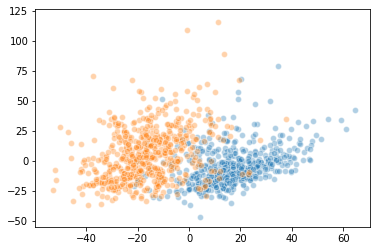

In [9]:
brca_samp = df_pca[df_pca['BRCA']==1]
plt.scatter(brca_samp.iloc[:,0], brca_samp.iloc[:,1], edgecolors='w', alpha=0.35)

ovca_samp = df_pca[df_pca['BRCA']==0]
plt.scatter(ovca_samp.iloc[:,0], ovca_samp.iloc[:,1], edgecolors='w', alpha=0.35)
plt.show()
